# Introduction to Data Science - Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 9, 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

## Your Data
**First Name:** Rebecca Rodriguez
<br>
**Last Name:** Rodriguez
<br>

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

%config IPCompleter.greedy=True

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])


===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

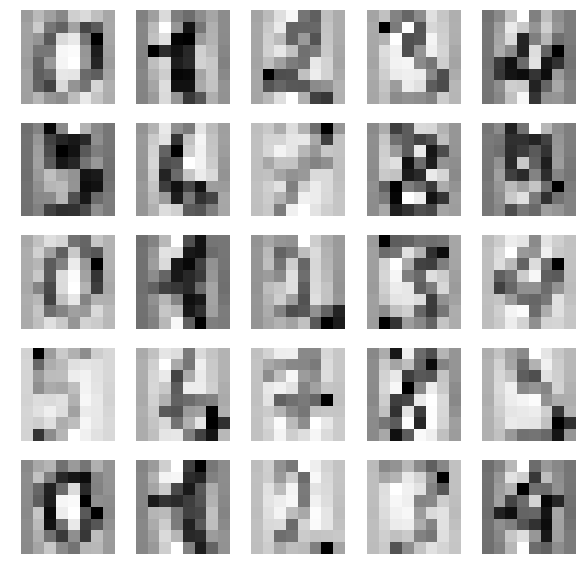

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
# Task 1

#split data into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=.8)

SVM model with rbf kernel and C=100:
 Accuracy =  0.952712100139082
 Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]

Images of misclassified digits:


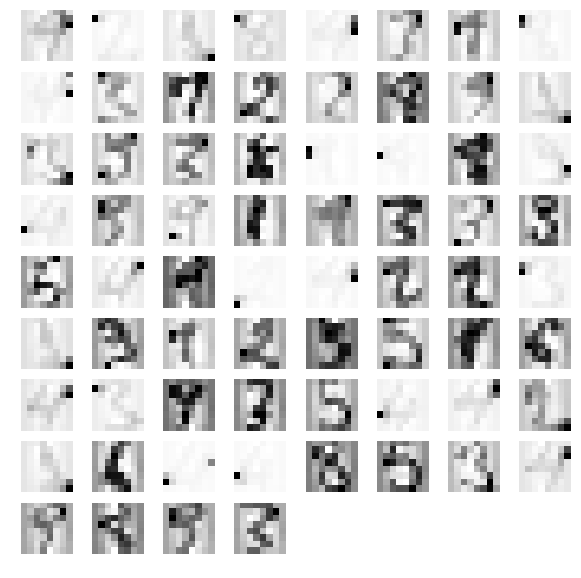

In [6]:
# Task 1.1: SVM

#set up the model: SVM with rbf kernel and C=100
model = svm.SVC(kernel='rbf', C=100)
model.fit(XTrain, yTrain) 

#use test data to compute score and create confusion matrix
print("SVM model with rbf kernel and C=100:")
yPred = model.predict(XTest)
print(' Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = yPred))
print(' Confusion Matrix:')
print(metrics.confusion_matrix(y_true = yTest, y_pred = yPred))

#grab indexes of misclassified digits
mismatch_indexes = []
for i in range(len(yTest)):
    if yTest[i] != yPred[i]:
        mismatch_indexes.append(i)

#print images of misclassified digits
print("\nImages of misclassified digits:")
plt.figure(figsize= (10, 10))    
for ii in np.arange(len(mismatch_indexes)):
    plt.subplot(9, 8, ii+1)
    plt.imshow(np.reshape(XTest[mismatch_indexes[ii],:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


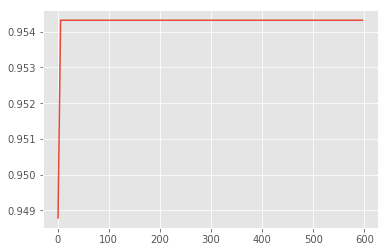

In [7]:
#Task 1.1 Cont: SVM cross-validation

#test 100 c values between 1 and 500
c_cvs = list(range(1,600, 5))
accuracy_svm = [] #hold accuracies for tested c values

for c in c_cvs: 
    model = svm.SVC(kernel='rbf', C=c)
    scores = cross_val_score(estimator = model, X=X, y=y, cv=5, scoring='accuracy')    
    accuracy = scores.mean()
    accuracy_svm.append(accuracy)

#visualize c values and accuracies
plt.plot(c_cvs, accuracy_svm)
plt.show()

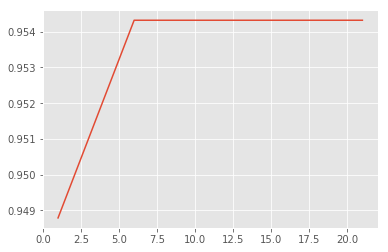

In [8]:
#zoom in on c values and accuracies
plt.plot(c_cvs[:5], accuracy_svm[:5])
plt.show()


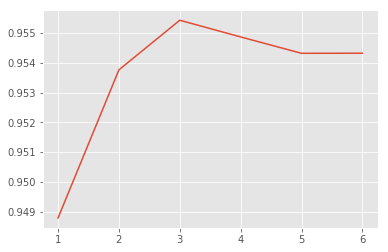

Best Accuracy:  0.9554266765714182


In [9]:
#test values between 1 and 6
acc2 = []
for c in range(1,7): 
    model = svm.SVC(kernel='rbf', C=c)
    scores = cross_val_score(estimator = model, X=X, y=y, cv=5, scoring='accuracy')    
    accuracy = scores.mean()
    acc2.append(accuracy)

plt.plot(range(1,7), acc2)
plt.show()
print("Best Accuracy: ", max(acc2))

In [10]:
#train and test k-nn model w/c=6 on raw (non-scaled) data
X_raw = digits.data

#split raw data into training and test sets
XTrain_raw, XTest_raw, yTrain_raw, yTest_raw = train_test_split(X_raw, y, random_state=1, test_size=.8)

# set up the model: k-NN classification with C=3
svm_model_best = svm.SVC(kernel='rbf', C=3)

#fit training dataset to model
svm_model_best.fit(XTrain_raw, yTrain_raw)

#use test dataset to compute score (accuracy)
yPredict_raw = svm_model_best.predict(XTest_raw)
svm_score_raw = round(metrics.accuracy_score(yTest_raw, yPredict_raw), 2)
print("SVM model with C = 3 and raw data \n Accuracy: ", svm_score_raw)

SVM model with C = 3 and raw data 
 Accuracy:  0.12


**Your Interpretation Task 1.1**: 

The accuracy of our classification model using SVM with C=10o (and splitting the data 20/80 as training/testing sets) is 95%. That is, our classifier accurately identified 95% of the test data as the correct digit. From our confusion matrix we can see that the most common mistake the SVM classifier made was classifying 4's as 7's.

After testing 100 c values from 1 to 500 (incrementing by 5), the most accurate classifier had a C value of 6 and an accuracy of 95%. Interestingly, the accuracy leveled-off after c=6. However, becuase our step-size was 5, it is possible that we achieved a higher accuracy between 1 and 6. Therefore, cross-validation was performed for c values 1-5, which yielded the best accuracy of 95.5% at a c value of 3.

Once the best c value was determined, the SVM classifier was trained and tested with c=3 on the raw (un-scaled) data. This yielded an abysmal accuracy of 12%. We can conclude that scaling the data improves our accuracy by 83% when using the SVM classifier.



### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

k-NN model with k = 10 
 Accuracy:  0.91
 Confusion matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
 Images of misclassified digits:


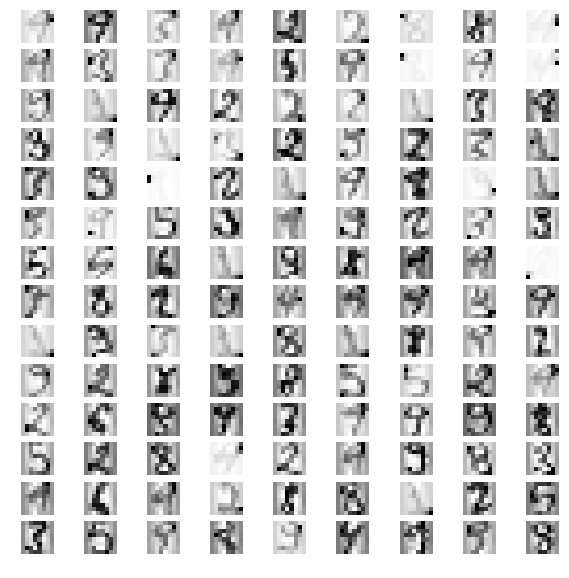

In [11]:
# Task 1.2: K-NN

# set up the model: k-NN classification with k=10
k = 10
knn_model = KNeighborsClassifier(n_neighbors=k)

#fit training dataset to model
knn_model.fit(XTrain, yTrain)

#use test dataset to compute score (accuracy)
yPredict = knn_model.predict(XTest)
knn_score = round(metrics.accuracy_score(yTest, yPredict), 2)
print("k-NN model with k = 10 \n Accuracy: ", knn_score)

#use test dataset to create confusion matrix
print(" Confusion matrix:")
print(metrics.confusion_matrix(y_true = yTest, y_pred = yPredict))
 
#grab indexes of misclassified digits
mismatch_indexes = []
for i in range(len(yTest)):
    if yTest[i] != yPredict[i]:
        mismatch_indexes.append(i)

#print images of misclassified digits
print(" Images of misclassified digits:")
plt.figure(figsize= (10, 10))    
for ii in np.arange(len(mismatch_indexes)):
    plt.subplot(14, 9, ii+1)
    plt.imshow(np.reshape(XTest[mismatch_indexes[ii],:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


In [12]:
#use 'cross_val_score' function to evaluate accuracy of model w/k=1-100
knn_cvs = []
accuracy_cvs = 0
best_k = 0

for k in range(1,101):
    knn_mod = KNeighborsClassifier(n_neighbors=k)
    scores = (cross_val_score(estimator = knn_mod, X = X, y = y, cv=5, scoring='accuracy'))
    accuracy = scores.mean() #calc mean accuracy of all 5 scores
    if accuracy > accuracy_cvs:  #compare accuracies and determine best k
        accuracy_cvs = accuracy
        best_k = k
    
print("Best k: ", best_k, "\nAccuracy score: ", accuracy_cvs)

Best k:  6 
Accuracy score:  0.9449625045302066


In [13]:
#train and test k-nn model w/k=6 on raw (non-scaled) data
X_raw = digits.data

#split raw data into training and test sets
XTrain_raw, XTest_raw, yTrain_raw, yTest_raw = train_test_split(X_raw, y, random_state=1, test_size=.8)

# set up the model: k-NN classification with k=6
knn_model_best = KNeighborsClassifier(n_neighbors=best_k)

#fit training dataset to model
knn_model_best.fit(XTrain_raw, yTrain_raw)

#use test dataset to compute score (accuracy)
yPredict_raw = knn_model_best.predict(XTest_raw)
knn_score_raw = round(metrics.accuracy_score(yTest_raw, yPredict_raw), 2)
print("k-NN model with k = 6 and raw data \n Accuracy: ", knn_score_raw)

k-NN model with k = 6 and raw data 
 Accuracy:  0.95


**Your Interpretation: Task 1.2**

The accuracy of our classification model using k-NN with k=10 (and splitting the data 20/80 as training/testing sets) is 91%. That is, our classifier accurately identified 91% of the test data as the correct digit. From our confusion matrix we can see that the most common mistake the k-NN classifier made was classifying 1's as 2's. The second most common mistake was classifying 9's as 2's. 

After testing 100 k values from 1 to 100, the most accurate classifier had a k value of 6 and an accuracy of 94.5%. 

Once the best k value was determined, we trained and tested the k-NN classifier with k=6 on the raw (un-scaled) data. This yielded an accuracy of 95%. We can conclude that scaling the data does not improve our accuracy using the k-NN classifier. 

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [14]:
# Task 2.1: import the data

#read csv into a df
articles = pd.read_csv("OnlineNewsPopularity.csv")

#remove whitespace in headers
articles.rename(columns=lambda x: x.strip(), inplace=True)

#save shares column (target variable) as numpy array
shares = articles['shares'].as_matrix()

#remove url, timedelta and shares columns
articles = articles.drop(['url', 'timedelta', 'shares'], axis=1)

#create numpy array of df
X = articles.as_matrix()

# articles.head()
# articles.describe()
# articles.info()

In [15]:
# Task 2.1 cont: create binary numpy array for popularity

y = np.empty(shape=len(shares), dtype=int)

#article popular if shares > median shares
for idx, item in enumerate(shares):
    if item > np.median(shares):
        y[idx] = 1  #1 indicates popular
    else:
        y[idx] = 0  #0 indicates not popular


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [16]:
#NOTE: this will keep removing the max if run more than once

#min, max, med of shares
print("min: ", shares.min())
print("median: ", np.median(shares))
print("max: ", shares.max())

#identify outlier and remove
max_index = np.where(shares==shares.max())
shares = np.delete(shares, max_index)


min:  1
median:  1400.0
max:  843300


In [17]:
#verify we've removed the outlier
shares.max()

690400

While it is possible that the maximum number of shares could be over 800,000, we will remove this from our data since it is an outlier (the closest number is in the 600,000's). 

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [18]:
# Task 2.3: Develop k-NN classification model

#this function uses 'cross_val_score' function to evaluate accuracy of KNeighborClassifier k values.
#uses articles dataframe matrix for data, X , and binary popularity array for labels, y.

#parameter: list of k values to test
#return: list of accuracies for each corresponding k value

def test_k_values(values):
    accuracies = []
    for k in values:
        knn_mod = KNeighborsClassifier(n_neighbors=k)
        scores = (cross_val_score(estimator = knn_mod, X = X, y = y, cv=5, scoring='accuracy'))
        accuracy = scores.mean() #calc mean accuracy of all 5 scores
        accuracies.append(accuracy)
        
    return accuracies

In [19]:
#let's find best k value
knn_cvs = [] #hold cv accuracies for test values

#first let's test small values of k between 1 and 9
round1_k = list(range(1, 10))
k1 = test_k_values(round1_k)

#update our lists
knn_cvs = k1
k_test_values = round1_k #hold tested values

print(len(knn_cvs))
print(len(k_test_values))

9
9


In [20]:
#next we'll test k values from 10 to 90 in increments of 10
round2_k = list(range(10, 100, 10))
k2 = test_k_values(round2_k)

#update our lists
knn_cvs += k2
k_test_values += round2_k

print(len(knn_cvs))
print(len(k_test_values))

18
18


In [21]:
# #finally, we'll test big values of k from 100 to 1000 in increments of 100
# round3_k = list(range(100, 300, 100))
# k3 = test_k_values(round3_k)

# #update our lists
# knn_cvs += k3
# k_test_values += round3_k

# print(len(knn_cvs))
# print(len(k_test_values))

Best Accuracy: 0.5527735050511349
k-value for Best Accuracy: 40


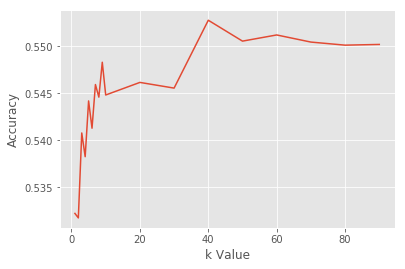

In [22]:
#visualize k values and accuracies
plt.plot(k_test_values, knn_cvs)
plt.xlabel("k Value")
plt.ylabel("Accuracy")
plt.show

print("Best Accuracy:", max(knn_cvs))
print("k-value for Best Accuracy:", k_test_values[knn_cvs.index(max(knn_cvs))])

**Interpretation:** 

The process of using cross-validation to determine the best k value for the k-NN classifier was segmented into two major parts. First, k values between 1 and 9 in increments of 1 were tested. Then, k values between 10 and 90 (in increments of 10) were tested. The results were fairly dismal. The highest accuracy of 55% was achieved with a k-value of 40, and accuracy results continued to drop past 54% for k-values greater than or equal to 200. The k-NN classifier is not a particularly useful tool for predicting the popularity of news articles on Mashable.com. 


### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes to run on the whole dataset.

In [23]:
# Task 2.4: SVM

#we'll only use the first 5,000 articles
articles_small = articles.head(5000)

#transform df into matrix
X_small = articles_small.as_matrix()
y_small = y[:5000]


#this function uses 'cross_val_score' function to evaluate accuracy of SVM C values.
#uses first 5000 items from articles dataframe (as matrix) for data, X, 
#and first 5000 items from binary popularity array for labels, y.

#parameter: list of c values to test
#return: list of accuracies for each corresponding c value

def test_c_values(values):
    accuracies = []
    for c in values:
        svm_mod = svm.SVC(kernel='rbf', C=c)
        scores = cross_val_score(estimator = svm_mod, X = X_small, y = y_small, cv=5, scoring='accuracy')
        accuracy = scores.mean() #calc mean accuracy of all 5 scores
        accuracies.append(accuracy)
        
    return accuracies

In [24]:
#let's find best c value

#first let's test small values of c between 2 and 10
round1_c = list(range(2, 11))
c1 = test_c_values(round1_c)

#make our lists
svm_cvs = c1  #hold cv accuracies for test values
c_test_values = round1_c  #hold tested c values

print(len(svm_cvs))
print(len(c_test_values))


9
9


In [25]:
#next let's test bigger values of c between 100 and 112 (increments of 2)
round2_c = list(range(100, 112))
c2 = test_c_values(round2_c)

#opdate our lists
svm_cvs += c2 
c_test_values += round2_c

print(len(svm_cvs))
print(len(c_test_values))

21
21


In [26]:
#finally let's test even bigger values of c between 500 and 512 (increments of 2)
round3_c = list(range(500, 512))
c3 = test_c_values(round3_c)

#opdate our lists
svm_cvs += c3 
c_test_values += round3_c

print(len(svm_cvs))
print(len(c_test_values))

33
33


Best accuracy:  0.5618000246000247


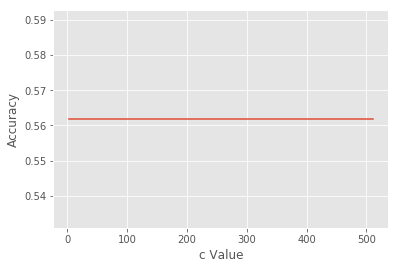

In [27]:
#visualize c values and accuracies
plt.plot(c_test_values, svm_cvs)
plt.xlabel("c Value")
plt.ylabel("Accuracy")
plt.show

print("Best accuracy: ", svm_cvs[0])

The plot above shows that no matter what the value of c, our SVM classifier maintains an accuracy of 56%. 

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [28]:
#function to split data into training and data sets
#parameter 'features' is list of variables from df we want to include
def splitData(features):
    predictors = articles[features].as_matrix()
    target = y #this is our binary array that indicates popularity

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(predictors, target, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [29]:
# Task 2.5: Decision trees

#list of all features
all_features = list(articles)

#let's first split and train data by all features
XTrain, XTest, yTrain, yTest = splitData(all_features)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

#predictions on training data
print("Using Decision Tree Classifier with all data features and no specified max depth or min samples split:")
y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

#predictions on test data
y_pred = decisionTree.predict(XTest)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))


Using Decision Tree Classifier with all data features and no specified max depth or min samples split:
Accuracy on training data =  1.0
Accuracy on test data =  0.5763797800423771


Now we'll use cross-validation to find the best max depth for our decision tree. Note that in general we would like a less-complex model; therefore, we will restrict our cross-validation to only test max depth values between 1 and 10.

In [30]:
# Task 2.5 cont: find best max depth

#use 'cross_val_score' function to evaluate accuracy of model with various max_depth values
dt_cvs_md = [] #hold cv scores for max depth
accuracy_cvs = 0
best_md = 0

#let's find best max_depth by testing values between 1 and 10
for i in range(1,11):
    dt_mod = tree.DecisionTreeClassifier(max_depth=i)
    scores = (cross_val_score(estimator = dt_mod, X = X, y = y, cv=5, scoring='accuracy'))
    accuracy = scores.mean() #calc mean accuracy of all 5 scores
    dt_cvs_md.append(accuracy)


<function matplotlib.pyplot.show>

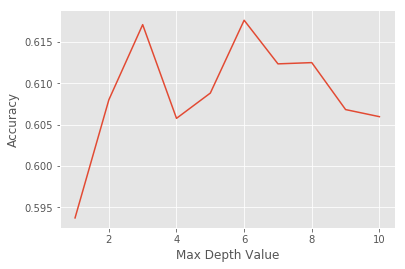

In [31]:
#visualize depths and accuracies
plt.plot(range(1,11), dt_cvs_md)
plt.xlabel("Max Depth Value")
plt.ylabel("Accuracy")
plt.show

We can see that the highest accuracy of 61.76% is obtained at a depth of 6, and the second highest accuracy of 61.71% is obtained at a depth of 3. To control the complexity of our decision tree, let's stick with a max depth of 3.

Now we will use cross-validation to find the best minimum samples split (mss) value for our decision tree. Note that in general a larger sample split will yield a less-complex tree; therefore we won't consider small values (i.e. anything less than 10) for our minimum sample split value.

In [32]:
#Task 2.5 cont: find best min samples split

#this function uses 'cross_val_score' function to evaluate accuracy of DecisionTreeClassifier 
#with various min_samples_split values. uses articles dataframe matrix for data, X , and 
#binary popularity array for labels, y.

#parameter: list of min_samples_split values to test
#return: list of accuracies for each corresponding min_samples_split value

def test_mss_values(values):
    accuracies = []
    for j in values:
        dt_mod = tree.DecisionTreeClassifier(min_samples_split=j)
        scores = (cross_val_score(estimator = dt_mod, X = X, y = y, cv=5, scoring='accuracy'))
        accuracy = scores.mean() #calc mean accuracy of all 5 scores
        accuracies.append(accuracy)
    
    return accuracies

In [33]:
#let's find best min_samples_split 
dt_cvs_mss = [] #hold cv accuracies for test values

#first let's test values between 2 and 10 (just for kicks)
round1_mss = list(range(2,11))
mss_1 = test_mss_values(round1_mss)

#update our lists
dt_cvs_mss = mss_1
mss_test_values = round1_mss #hold tested values

print(len(dt_cvs_mss))
print(len(mss_test_values))

9
9


In [34]:
#next let's test values between 10 and 50 in increments of 5
round2_mss = list(range(10, 55, 5))
mss_2 = test_mss_values(round2_mss)

#update our lists
dt_cvs_mss += mss_2
mss_test_values += round2_mss

print(len(dt_cvs_mss))
print(len(mss_test_values))

18
18


In [35]:
#now let's test values between 100 and 450 in increments of 50
round3_mss = list(range(100, 500, 50))
mss_3 = test_mss_values(round3_mss)

#update our lists
dt_cvs_mss += mss_3
mss_test_values += round3_mss

print(len(dt_cvs_mss))
print(len(mss_test_values))

26
26


In [36]:
#finally, let's test big values between 500 and 1000 in increments of 100
round4_mss = list(range(500, 1100, 100))
mss_4 = test_mss_values(round4_mss)

#update our lists
dt_cvs_mss += mss_4
mss_test_values += round4_mss

print(len(dt_cvs_mss))
print(len(mss_test_values))

32
32


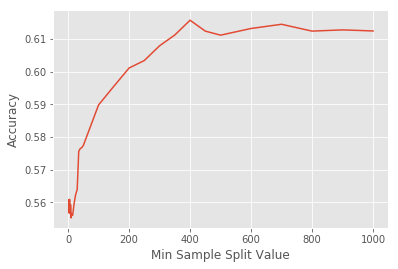

In [37]:
#visualize mss test values and accuracies
plt.plot(mss_test_values, dt_cvs_mss)
plt.xlabel("Min Sample Split Value")
plt.ylabel("Accuracy")
plt.show()

From the plot above, we see that we achieve the best accuracy of 61.6% with an mss value of 400. The second-highest "peak" in accuracy is of 60% and is achieved at an mss value of 200. It's difficult to say how generalized our model will be with an mss value of 400 compared to 200, but with a 2% increase in accuracy, we'll take it. 

Now we can use our best max depth and mss values to create a decision tree model to fit our data.

In [38]:
# create model with best max_depth and min_samples_size
dt_model = tree.DecisionTreeClassifier(max_depth=3 ,min_samples_split=400)
scores = (cross_val_score(estimator = dt_model, X = X, y = y, cv=5, scoring='accuracy'))
accuracy = scores.mean() #calc mean accuracy of all 5 scores

print("Decision Tree Accuracy, max_depth = 3, min_samples_split = 400:", accuracy)

Decision Tree Accuracy, max_depth = 3, min_samples_split = 400: 0.6170949262148746


With a max depth of 3 and a mss value of 400, we obtain an accuracy of 62%. That is, our decision tree correctly determines the popularity of an article on Mashable.com 61% of the time. This is not great, but an improvement from prior models.

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** 

1. The decision tree worked best. Despite only obtaining an accuracy of 62% on our data, the decision tree (with max depth of 3 and min sample size value of 400) outperformed both SVM and k-NN by 6% and 7%, respectively. 

2. 
    SVM: The parameter c, our penalty, did not play any kind of role in influencing the accuracy. Regardless of the c value we chose, we maintained an accuracy of 56%.
    
    k-NN: The parameter k, the number of "neighbors" used in classification, played a large role in determining the accuracy. The smaller the k value, the more accuracy we obtained. However, as k decreases, we begin over-fit our data.
    
    Decision tree: Both parameters max depth and min samples size (mss), played a role in determining the accuracy. However, much like k in our k-NN model, both must be chosen so as not to overfit the data and become an overly-complex model. as such, we restricted our max depth and allowed our mss value to be fairly large. Both parameters also had values at which they "leveled-off". 
    
3. The model easiest to interpret was k-nn. There was only one parameter, k, that was well defined with a meaninful effect on accuracy. That is, it was more intuitive to understand how k was affecting accuracy: as k decreased (to a certain value), accuracy improved, and as k increased past a certain value, accuracy suffered becuase the model became too general. Similarly, decision trees are easy to interpret; however, becuase there are two parameters instead of one, it is a bit harder than k-NN to understand. In particular, min_samples_size was a bit mysterious in that it is unclear what large values are good. 

4. SVM: No matter what the value of c, our SVM classifier maintains an accuracy of 56%. That is, the SVM classifier can correctly predict the popularity of Mashale.com articles 56% of the time. This is not far from 50%-- a random guess. 
    
    k-NN: The results were fairly dismal. The highest accuracy of 55% was achieved with a k-value of 40, and accuracy results continued to drop past 54% for k-values greater than or equal to 200. The k-NN classifier is not a particularly useful tool for predicting the popularity of news articles on Mashable.com. Like the SVM classifier, k-NN is not much better than a random guess.
    
    Binary tree: The decision tree correctly determined the popularity of an article on Mashable.com 61% of the time. This is not great, but an improvement from both SVM and k-NN.


** Reference Solution:** 

1. Decision trees work the best was better than KNN
+ Parameters
    + For decision trees, higher splits had a positive effect, topping out at about 400.
    + For SVM, C didn't have a noticable effect. It performed poorly anyways and takes very long.
    + For k-NN a k of 50 perfomed best.
+ k-NN and decision trees are easy to interpret.
+ The accuracy of predicting popularity of newspaper articles using just those features is not very high; a chance pick would have an accuracy of 0.5.